<a href="https://colab.research.google.com/github/Lasata-T/Group1Project2/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import matplotlib.dates as mdates
from google.colab import files
import io

In [5]:
# data source 1: https://covid.cdc.gov/covid-data-tracker/#trends_weeklyhospitaladmissions_select_00

In [ ]:
# data source 2: https://covid.cdc.gov/covid-data-tracker/#trends_weeklydeaths_select_00

In [9]:
uploaded = files.upload()

Saving data_table_for_weekly_deaths__the_united_states (2).csv to data_table_for_weekly_deaths__the_united_states (2).csv
Saving data_table_for_weekly_covid19_hospital_admissions_-_the_united_states (1).csv to data_table_for_weekly_covid19_hospital_admissions_-_the_united_states (1).csv


In [64]:
df_hospital = pd.read_csv('data_table_for_weekly_covid19_hospital_admissions_-_the_united_states (1).csv')
df_deaths = pd.read_csv('data_table_for_weekly_deaths__the_united_states (2).csv')

In [65]:
# Convert 'Date' columns to datetime format
df_hospital['Date'] = pd.to_datetime(df_hospital['Date'], format='%b %d %Y')
df_deaths['Date'] = pd.to_datetime(df_deaths['Date'], format='%b %d %Y')

# Merge the datasets on 'Date' and 'Geography'
df_merged = pd.merge(df_hospital, df_deaths, on=['Date', 'Geography'], how='inner', suffixes=('_admissions', '_deaths'))


df_merged.head()

,Geography,Date,Weekly COVID-19 Hospital Admissions,Weekly Deaths,Death Data As Of
0,United States,2024-02-17,18977.0,526,Feb 22 2024
1,United States,2024-02-10,20129.0,1129,Feb 22 2024
2,United States,2024-02-03,21212.0,1398,Feb 22 2024
3,United States,2024-01-27,23297.0,1883,Feb 22 2024
4,United States,2024-01-20,25979.0,2210,Feb 22 2024


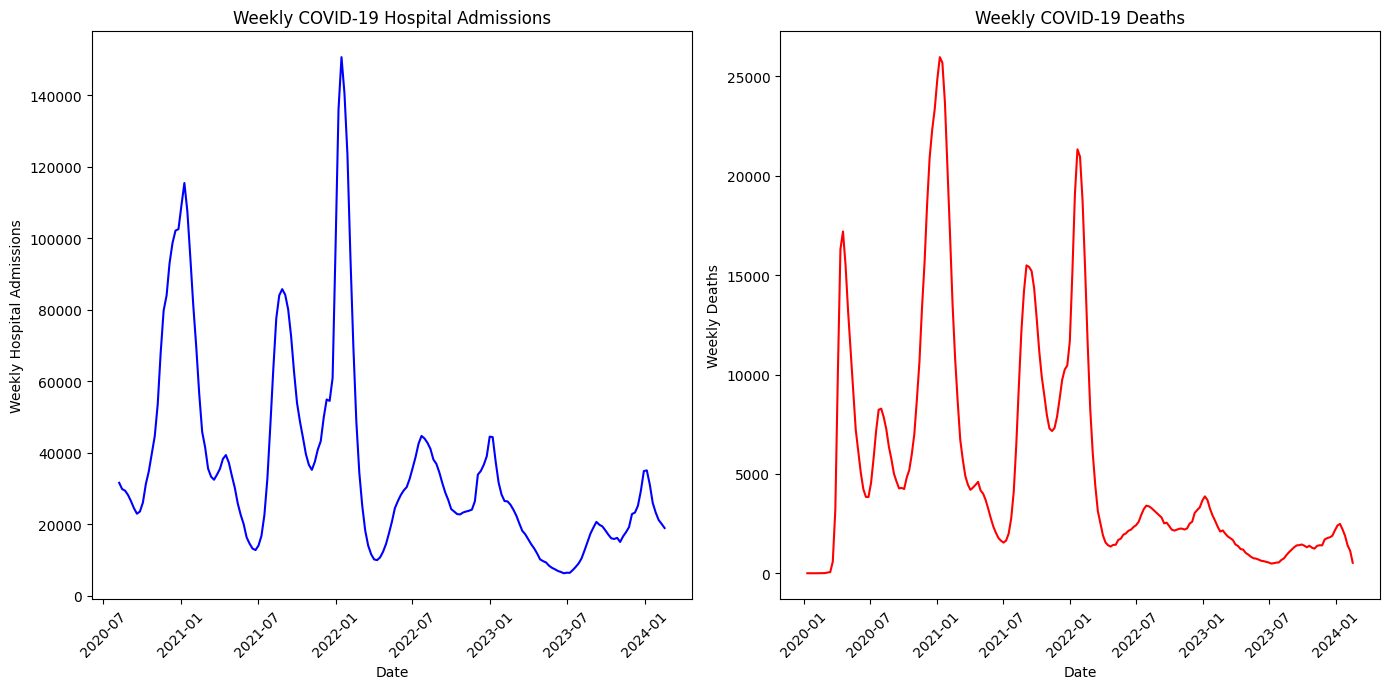

In [66]:

plt.figure(figsize=(14, 7))

# Plotting Weekly COVID-19 Hospital Admissions
plt.subplot(1, 2, 1)
plt.plot(df_merged['Date'], df_merged['Weekly COVID-19 Hospital Admissions'], label='Hospital Admissions', color='blue')
plt.title('Weekly COVID-19 Hospital Admissions')
plt.xlabel('Date')
plt.ylabel('Weekly Hospital Admissions')
plt.xticks(rotation=45)
plt.tight_layout()

# Plotting Weekly COVID-19 Deaths
plt.subplot(1, 2, 2)
plt.plot(df_merged['Date'], df_merged['Weekly Deaths'], label='Deaths', color='red')
plt.title('Weekly COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('Weekly Deaths')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

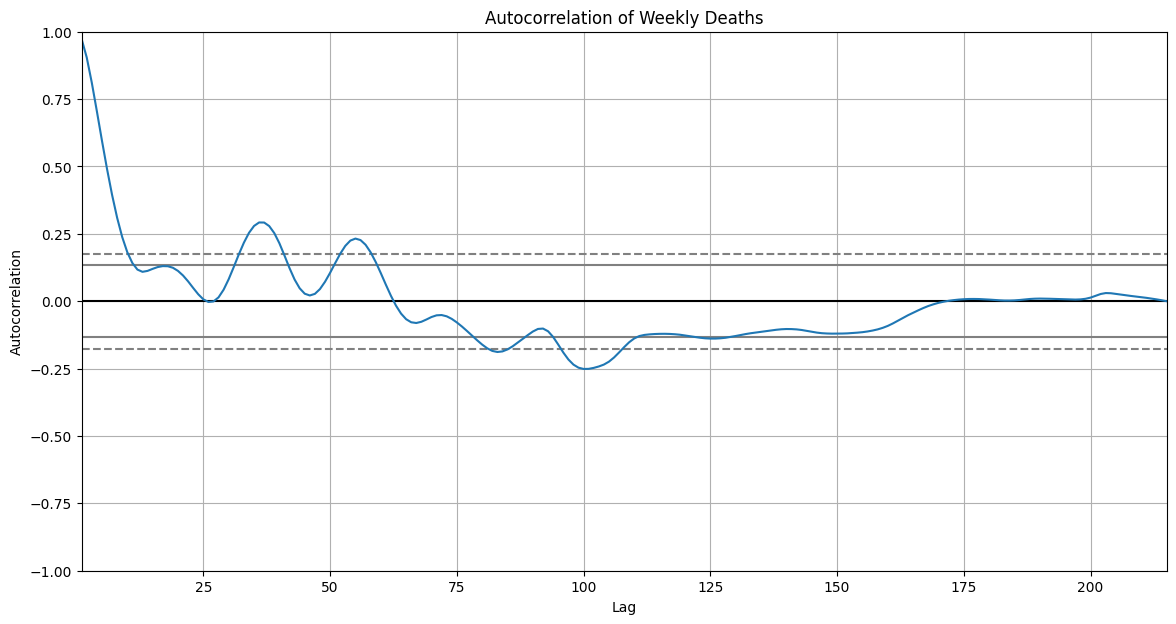

In [75]:
from pandas.plotting import autocorrelation_plot


plt.figure(figsize=(14, 7))
autocorrelation_plot(df_deaths['Weekly Deaths'])
plt.title('Autocorrelation of Weekly Deaths')
plt.show()



In [78]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMA model
model = ARIMA(df_merged['Weekly Deaths'], order=(1, 0, 1))
model_fit = model.fit()

# Summary of the model
model_fit.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Weekly Deaths   No. Observations:                  215
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1739.510
Date:                Tue, 12 Mar 2024   AIC                           3487.019
Time:                        17:45:29   BIC                           3500.502
Sample:                             0   HQIC                          3492.467
                                - 215                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5488.2999   4332.952      1.267      0.205   -3004.130     1.4e+04
ar.L1          0.9695      0.017     56.159      0.000       0.936       1.003
ma.L1          0.8423      0.035     24.115      0.000       0.774       0.911
sigma2      6.088e+05    3.3e+04     18.475      0.000    5.44e+05    6.73e+05
===================================================================================
Ljung-Box (L1) (Q):                  73.94   Jarque-Bera (JB):               535.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              26.29   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ValueError: zero-size array to reduction operation fmin which has no identity

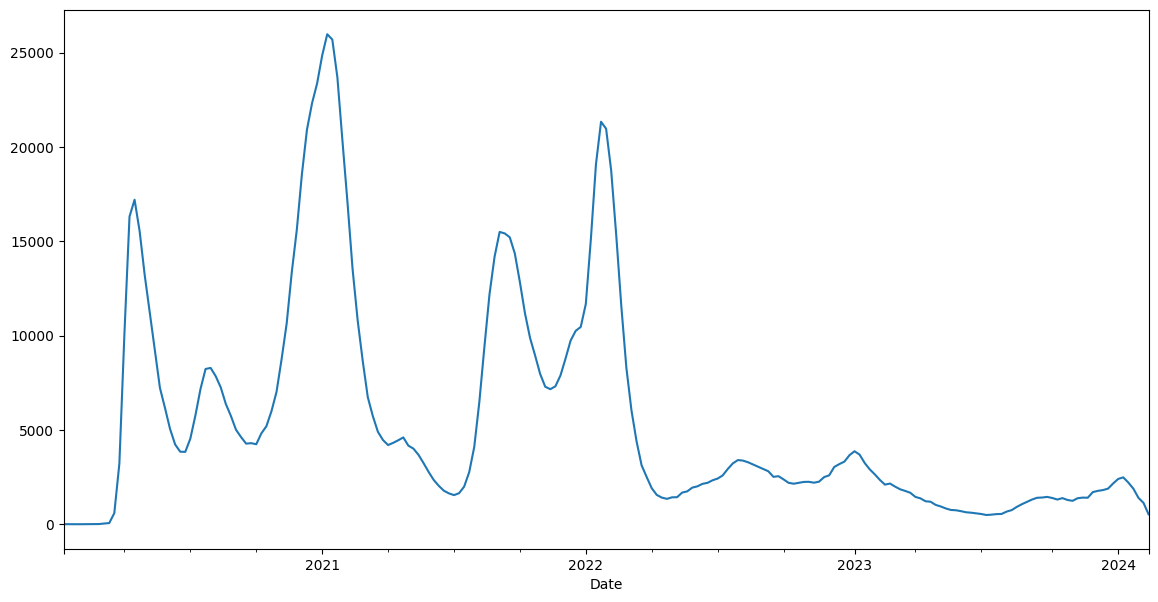

In [77]:

forecast_weeks = 12
forecast_start_date = df_merged['Date'].iloc[-1] + pd.Timedelta(weeks=1)

# Forecast dates
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_weeks, freq='W-SUN')

# Creating a Series for the forecasted values
forecast_series = pd.Series(model_fit.forecast(steps=forecast_weeks), index=forecast_dates)

# Plotting the original 'Weekly Deaths' data
df_merged.set_index('Date')['Weekly Deaths'].plot(label='Actual Weekly Deaths', figsize=(14, 7))

# Plotting the forecasted data
forecast_series.plot(label='Forecasted Weekly Deaths', style='--')

plt.legend()
plt.title('Weekly COVID-19 Deaths and Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Deaths')
plt.show()


In [72]:
print(forecast_series.head())  # Check the first few entries in the forecast series
print(df_merged.set_index('Date')['Weekly Deaths'].head())  # Check the actual data series


2020-01-19   NaN
2020-01-26   NaN
2020-02-02   NaN
2020-02-09   NaN
2020-02-16   NaN
Freq: W-SUN, Name: predicted_mean, dtype: float64
Date
2024-02-17     526
2024-02-10    1129
2024-02-03    1398
2024-01-27    1883
2024-01-20    2210
Name: Weekly Deaths, dtype: int64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided

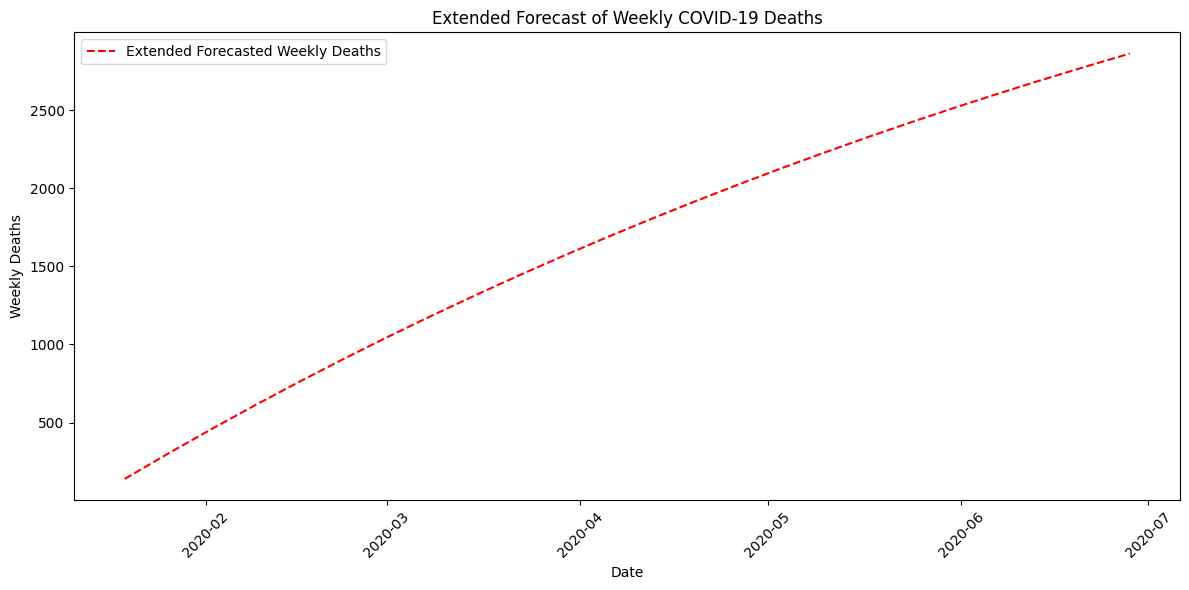

In [23]:
df_new = df.dropna()
df_new2=df2.dropna()
df_new
df_new2

,Geography,Date,Weekly Deaths,Death Data As Of
0,United States,Feb 17 2024,526,Feb 22 2024
1,United States,Feb 10 2024,1129,Feb 22 2024
2,United States,Feb 3 2024,1398,Feb 22 2024
3,United States,Jan 27 2024,1883,Feb 22 2024
4,United States,Jan 20 2024,2210,Feb 22 2024
...,...,...,...,...
210,United States,Feb 8 2020,4,Feb 22 2024
211,United States,Feb 1 2020,0,Feb 22 2024
212,United States,Jan 25 2020,3,Feb 22 2024
213,United States,Jan 18 2020,2,Feb 22 2024


In [18]:
geo = df_new['Geography']
date = df_new['Date']
admin = df_new['Weekly COVID-19 Hospital Admissions']

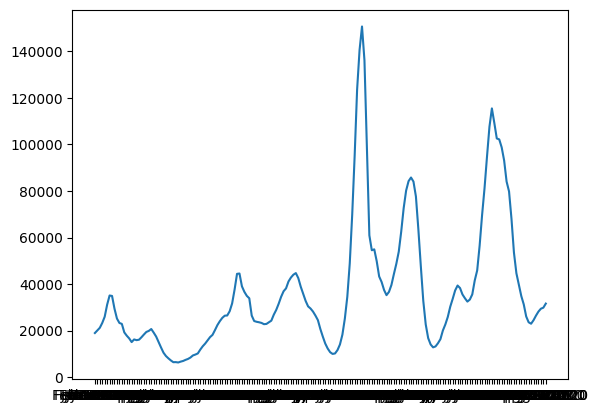

In [ ]:
plt.plot(date, admin)

In [24]:
type(df_new['Date'])

pandas.core.series.Series

In [25]:
df_new['Date'] = df_new['Date'].sort_values(ascending = False)

<ipython-input-25-a85ddfeae93a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df_new['Date'].sort_values(ascending = False)


In [26]:
df_new

,Geography,Date,Weekly COVID-19 Hospital Admissions
0,United States,Feb 17 2024,18977.0
1,United States,Feb 10 2024,20129.0
2,United States,Feb 3 2024,21212.0
3,United States,Jan 27 2024,23297.0
4,United States,Jan 20 2024,25979.0
...,...,...,...
180,United States,Sep 5 2020,26462.0
181,United States,Aug 29 2020,28194.0
182,United States,Aug 22 2020,29424.0
183,United States,Aug 15 2020,29869.0


In [35]:
# Load the datasets
hospital_admissions_path = '/mnt/data/data_table_for_weekly_covid19_hospital_admissions_-_the_united_states (1).csv'
deaths_path = '/mnt/data/data_table_for_weekly_deaths__the_united_states (2).csv'



FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/data_table_for_weekly_covid19_hospital_admissions_-_the_united_states (1).csv'

In [34]:


# Convert 'Date' columns to datetime format
df_hospital['Date'] = pd.to_datetime(df_hospital['Date'], format='%b %d %Y')
df_deaths['Date'] = pd.to_datetime(df_deaths['Date'], format='%b %d %Y')

# Merge the datasets on 'Date' and 'Geography'
df_merged = pd.merge(df_hospital, df_deaths, on=['Date', 'Geography'], how='inner', suffixes=('_admissions', '_deaths'))

# Display the first few rows of the merged dataframe to ensure correctness
df_merged.head()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/data_table_for_weekly_covid19_hospital_admissions_-_the_united_states (1).csv'

In [ ]:
uploaded2 = files.upload()

Saving death.csv to death (1).csv


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['death.csv']))
print(df2)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 4
